# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
import json
# Import API key
from spaghetti import weather_api_key as w_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

581


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
satchel=[]
for x in cities:
    url = (f'https://api.openweathermap.org/data/2.5/weather?q={x}&appid={w_key}')
    response = requests.get(url).json()
    try:
        if response.get('cod') == 200:
            satchel.append(response)
        else:
            print(x, 'doesnt exists')
    except:
        print(x, 'this shoudnt happen')

attawapiskat doesnt exists
barentsburg doesnt exists
jiddah doesnt exists
yirol doesnt exists
umzimvubu doesnt exists
saleaula doesnt exists
grand river south east doesnt exists
taolanaro doesnt exists
ruatoria doesnt exists
tunduru doesnt exists
amderma doesnt exists
barbar doesnt exists
belushya guba doesnt exists
mouzakion doesnt exists
cholan doesnt exists
sentyabrskiy doesnt exists
yuzhno-yeniseyskiy doesnt exists
kinanah doesnt exists
samusu doesnt exists
matto doesnt exists
tumannyy doesnt exists
kachikau doesnt exists
tsihombe doesnt exists
vaitupu doesnt exists
illoqqortoormiut doesnt exists
louisbourg doesnt exists
mys shmidta doesnt exists
vestbygda doesnt exists
ngukurr doesnt exists
malwan doesnt exists
bur gabo doesnt exists
paradwip doesnt exists
mocambique doesnt exists
galiwinku doesnt exists
tidore doesnt exists
nizhneyansk doesnt exists
meyungs doesnt exists
kerteh doesnt exists
babanusah doesnt exists
marcona doesnt exists
artyk doesnt exists
longlac doesnt exists
k

In [7]:
len(satchel)

530

In [8]:
len(satchel)
bag=[]
for i in range(0,530,1):
    bag.append(i)
weath = pd.DataFrame(bag)

In [9]:
city=[]
cloud=[]
cntry=[]
date=[]
hum=[]
lat=[]
lon=[]
temp=[]
wind=[]
for x in satchel:
    city.append(x.get('name'))
    cloud.append(x.get('clouds').get('all'))
    cntry.append(x.get('sys').get('country'))
    date.append(x.get('dt'))
    hum.append(x.get('main').get('humidity'))
    lat.append(x.get('coord').get('lat'))
    lon.append(x.get('coord').get('lon'))
    temp.append(x.get('main').get('temp_max'))
    wind.append(x.get('wind').get('speed'))

In [10]:
weath['City']=city
weath['Cloudiness']=cloud
weath['Country']=cntry
weath['Date']=date
weath['Humidity']=hum
weath['Lat']=lat
weath['Lng']=lon
weath['Max Temp']=temp
weath['Wind Speed']=wind

In [11]:
weath_er=weath.drop([0], axis=1)
weath_er['Max Temp']=(((weath_er['Max Temp']-273.15)*1.8)+32)
weath_er

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,90,CA,1580836288,75,69.45,-133.04,-18.400,5.70
1,Umm Lajj,0,SA,1580836289,64,25.02,37.27,62.708,2.25
2,Miraflores,40,MX,1580836289,42,19.22,-98.81,73.400,7.70
3,San Patricio,75,MX,1580836290,78,19.22,-104.70,77.000,1.39
4,Norman Wells,40,CA,1580836291,75,65.28,-126.83,-20.200,2.60
...,...,...,...,...,...,...,...,...,...
525,Asosa,19,ET,1580836597,25,10.07,34.53,73.238,2.42
526,Inirida,20,CO,1580836598,40,3.87,-67.92,98.438,0.39
527,Arona,20,ES,1580836598,43,28.10,-16.68,77.000,5.10
528,Trojes,75,AL,1580836599,67,41.76,19.96,60.800,8.20


In [16]:
city = "tuktoyaktuk"
url = (f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={w_key}')
response = requests.get(url).json()
#response[0].get('sys').get('country')

#print(json.dumps(data, indent=4, sort_keys=True))
#print(requests.get(url))
response.get('main').get('humidity')

75

In [ ]:

# for x in cities_df:
#     for index, row in cities_df.iterrows():
#         x = row['City']
#         url = (f'https://api.openweathermap.org/data/2.5/weather?q={x}&appid={w_key}')
#         response = requests.get(url).json()
#         try:
#             if response.get('cod') == 200:
#                 weather_df.loc[index, 'City'] = response.get('name')
#                 weather_df.loc[index, 'Cloudiness'] = response.get('clouds').get('all')
#                 weather_df.loc[index, 'Country'] = response.get('sys').get('country')
#                 weather_df.loc[index, 'Date'] = response.get('dt')
#                 weather_df.loc[index, 'Humidity'] = response.get('main').get('humidity')
#                 weather_df.loc[index,'Lat'] = response.get('coord').get('lat')
#                 weather_df.loc[index, 'Lng'] = response.get('coord').get('lon')
#                 weather_df.loc[index, 'Max Temp'] = response.get('main').get('temp_max')
#                 weather_df.loc[index, 'Wind Speed'] = response.get('wind').get('speed')
#             else:
#                 print(x, 'doesnt exists')
#         except:
            

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weath_er

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,90,CA,1580836288,75,69.45,-133.04,-18.400,5.70
1,Umm Lajj,0,SA,1580836289,64,25.02,37.27,62.708,2.25
2,Miraflores,40,MX,1580836289,42,19.22,-98.81,73.400,7.70
3,San Patricio,75,MX,1580836290,78,19.22,-104.70,77.000,1.39
4,Norman Wells,40,CA,1580836291,75,65.28,-126.83,-20.200,2.60
...,...,...,...,...,...,...,...,...,...
525,Asosa,19,ET,1580836597,25,10.07,34.53,73.238,2.42
526,Inirida,20,CO,1580836598,40,3.87,-67.92,98.438,0.39
527,Arona,20,ES,1580836598,43,28.10,-16.68,77.000,5.10
528,Trojes,75,AL,1580836599,67,41.76,19.96,60.800,8.20


In [18]:
import csv
weath_er.to_csv('weath_er.csv', sep=',')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature F')

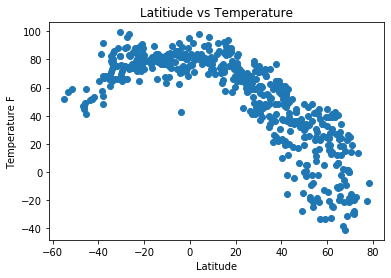

In [20]:
x_axis=weath_er['Lat']
y_axis=weath_er['Max Temp']
plt.scatter(x_axis, y_axis)
plt.title("Latitiude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature F")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

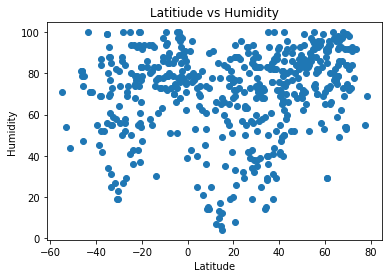

In [21]:
x_axis=weath_er['Lat']
y_axis=weath_er['Humidity']
plt.scatter(x_axis, y_axis)
plt.title("Latitiude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloud-cover')

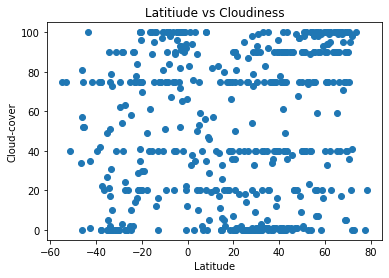

In [22]:
x_axis=weath_er['Lat']
y_axis=weath_er['Cloudiness']
plt.scatter(x_axis, y_axis)
plt.title("Latitiude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloud-cover")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed')

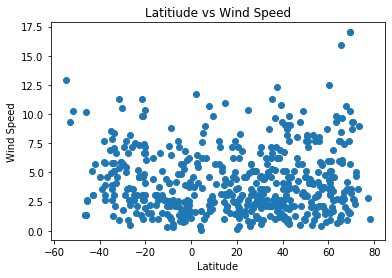

In [23]:
x_axis=weath_er['Lat']
y_axis=weath_er['Wind Speed']
plt.scatter(x_axis, y_axis)
plt.title("Latitiude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = census_data_complete['Poverty Rate'].astype('float')
y_values = census_data_complete['Bank Count'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Poverty Rate')
plt.ylabel('Bank Count')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression